## memory test on drugged islander

https://www.kaggle.com/datasets/steveahn/memory-test-on-drugged-islanders-data

Context
An experiment on the effects of anti-anxiety medicine on memory recall when being primed with happy or sad memories. The participants were done on novel Islanders whom mimic real-life humans in response to external factors.

Drugs of interest (known-as) [Dosage 1, 2, 3]:

A - Alprazolam (Xanax, Long-term) [1mg/3mg/5mg]

T - Triazolam (Halcion, Short-term) [0.25mg/0.5mg/0.75mg]

S- Sugar Tablet (Placebo) [1 tab/2tabs/3tabs]

*Dosages follow a 1:1 ratio to ensure validity
*Happy or Sad memories were primed 10 minutes prior to testing
*Participants tested every day for 1 week to mimic addiction

**Inspiration**
+ How does anti-anxiety medicine affect you differently by age?
+ Is there a level of plateauing in effectiveness of anti-anxiety medicine - if so, at what point?
+ Effect of anti-anxiety medicine on memory recall?
+ Effectiveness of placebos in a test environment?

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Data Project/Data Project/05. Experimental Playground/07. Youtube/13. Guided Project Data Analyst 3 Drugged Islander/Islander_data.csv')

In [ ]:
df.head()

,Unnamed: 0,index,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After
0,0,150,Daichi,Steiner,37,S,1,T,64.2,57.3
1,1,26,Kaito,Carrasco,35,S,2,A,75.0,82.9
2,2,93,Sara,Castro,35,H,2,S,46.0,43.2
3,3,115,Ryouta,Carrasco,49,H,3,S,62.8,54.1
4,4,55,Daichi,Gonzalez,68,H,3,A,41.9,67.4


# Drop

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.head()

,index,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After
0,150,Daichi,Steiner,37,S,1,T,64.2,57.3
1,26,Kaito,Carrasco,35,S,2,A,75.0,82.9
2,93,Sara,Castro,35,H,2,S,46.0,43.2
3,115,Ryouta,Carrasco,49,H,3,S,62.8,54.1
4,55,Daichi,Gonzalez,68,H,3,A,41.9,67.4


# EDA

## define palette


**colormind.io** for color palette

In [ ]:
palette = ['#1D4D69', '#07766D', '#3C753C']

# Memory_chng

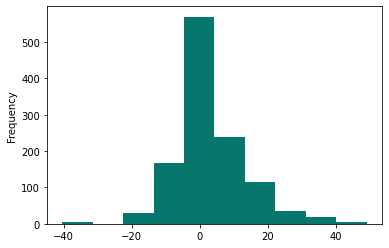

In [ ]:
df['Diff'] = df['Mem_Score_After'] - df['Mem_Score_Before']
df['Diff'].plot(kind='hist', color=palette[1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             1188 non-null   int64  
 1   first_name        1188 non-null   object 
 2   last_name         1188 non-null   object 
 3   age               1188 non-null   int64  
 4   Happy_Sad_group   1188 non-null   object 
 5   Dosage            1188 non-null   int64  
 6   Drug              1188 non-null   object 
 7   Mem_Score_Before  1188 non-null   float64
 8   Mem_Score_After   1188 non-null   float64
 9   Diff              1188 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 92.9+ KB


## Univariate Analysis - distributions

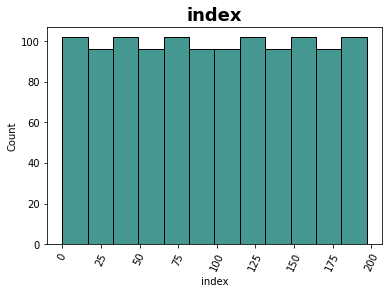

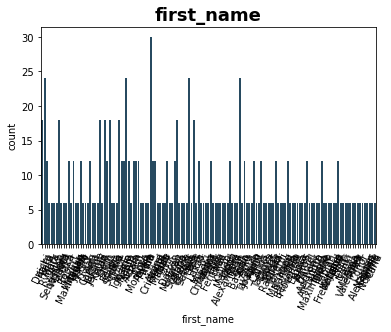

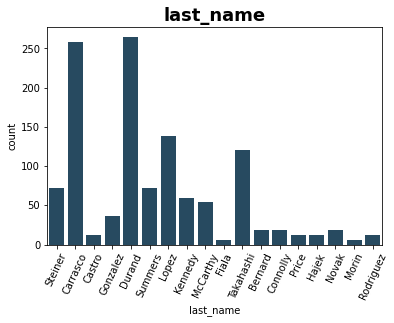

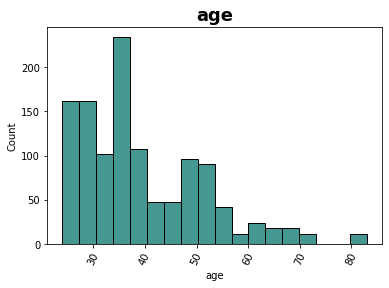

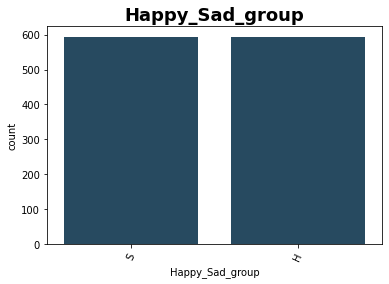

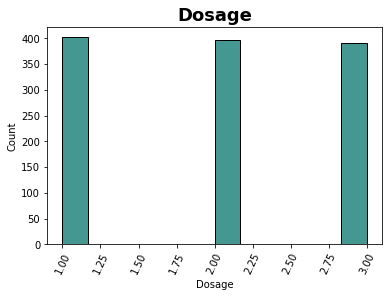

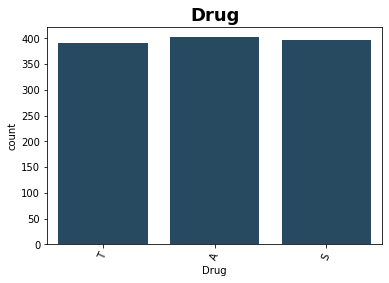

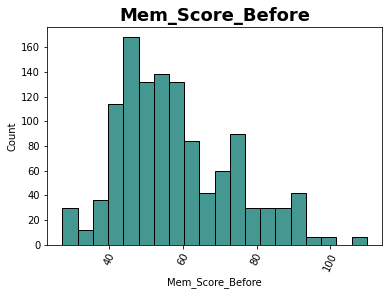

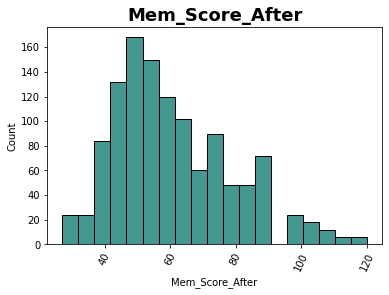

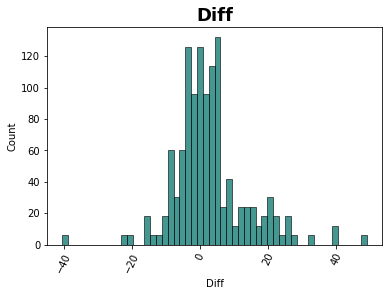

In [ ]:
for feat in df.columns:
  if df[feat].dtype == 'object':
    sns.countplot(data=df, x=feat, color=palette[0])
  else:
    sns.histplot(data=df, x=feat, color=palette[1])
  plt.title(feat, fontsize=18, fontweight='bold')
  plt.xticks(rotation=65)
  plt.show()

**Observations**

+ index - uniform distribution
+ last name - Durand and Carrasco appear significantly more often
+ age - weak exponential distribution
+ Happy_Sad_group - balanced classes
+ Dosage - interger only 3 values could be a category feature
+ Drug - equal balanced 3 classes
+ Mem_Score_Before - semi normal with slight right tail
+ Mem_Score_After - semi normal with slight right tail
+ Diff - semi normal with outliers on both sides

## Distributions by Happy_Sad_group

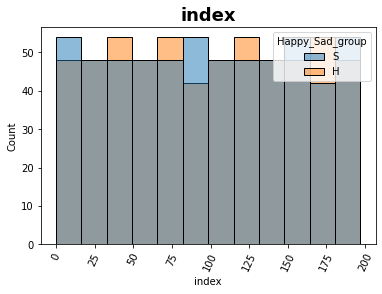

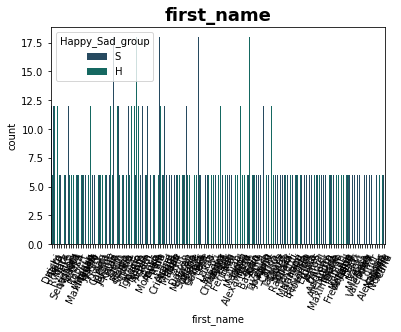

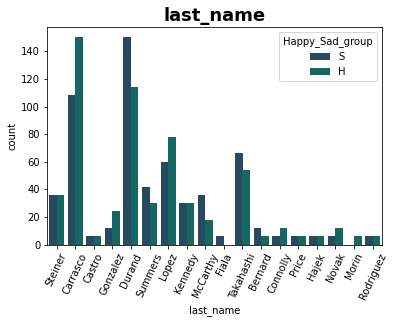

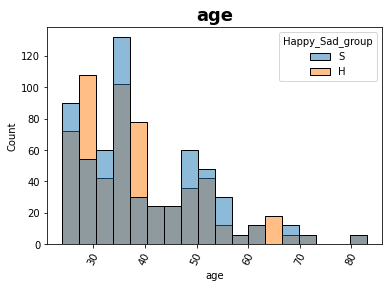

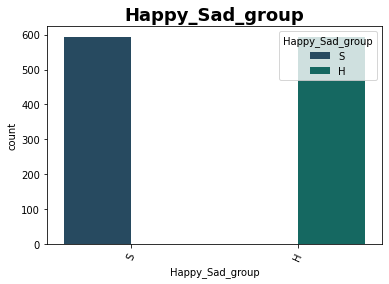

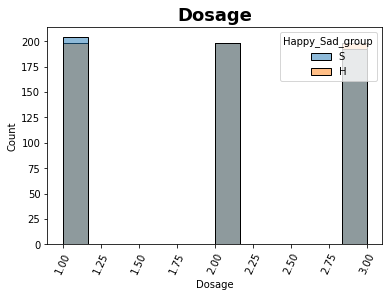

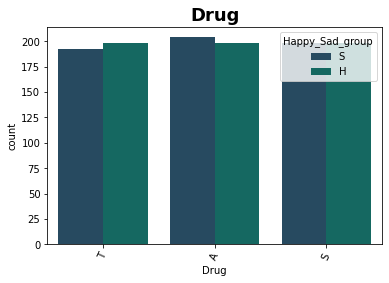

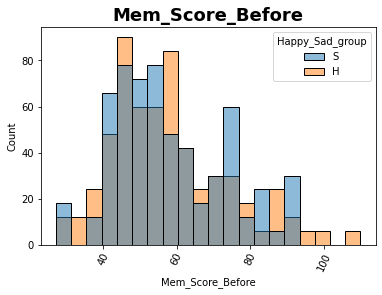

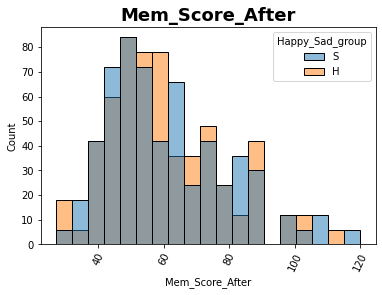

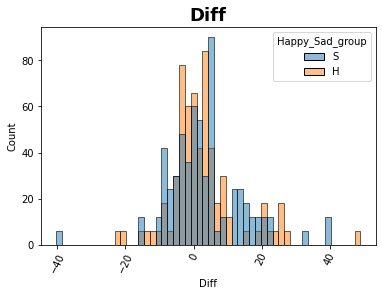

In [ ]:
for feat in df.columns:
  if df[feat].dtype == 'object':
    sns.countplot(data=df, x=feat, palette=palette, hue='Happy_Sad_group')
  else:
    sns.histplot(data=df, x=feat,  hue='Happy_Sad_group')
  plt.title(feat, fontsize=18, fontweight='bold')
  plt.xticks(rotation=65)
  plt.show()

**Observations**

+ last_name - Carrasco have disposition for Happy and Durand for Sad
 + could be related to family genetics

+ age - no evident effect on Happy_Sad_group
+ Dosage - no effect on Happy_Sad_group
+ Drug - no effect on Happy_Sad_group
+ Mem_Score_Before - no effect on Happy_Sad_group
+ Mem_Score_After - no effect on Happy_Sad_group
+ **An increase in memory shows relationship with more Sadness**


In [ ]:
df.groupby('Happy_Sad_group').mean()

,index,age,Dosage,Mem_Score_Before,Mem_Score_After,Diff
Happy_Sad_group,,,,,,
H,98.909091,39.101010,2.000000,57.843434,60.576768,2.733333
S,98.090909,39.959596,1.979798,58.091919,61.267677,3.175758


**Observations**

The sad group shows the highest increase in memory

## Distribution by drug

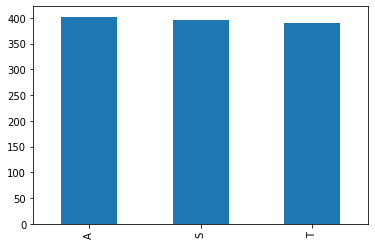

In [ ]:
df['Drug'].value_counts().plot(kind='bar')

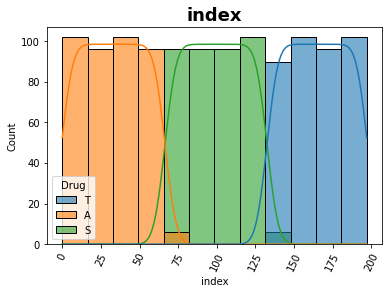

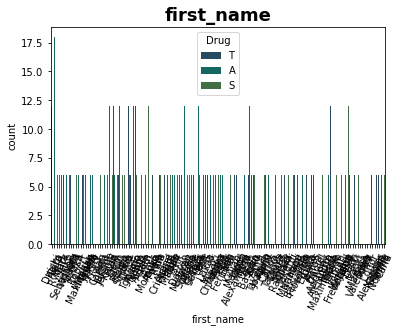

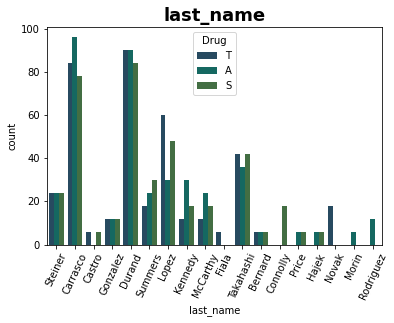

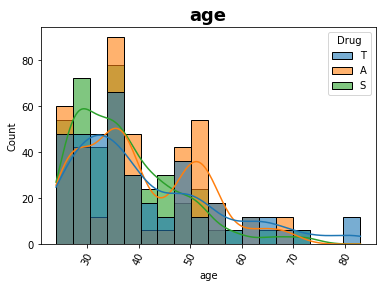

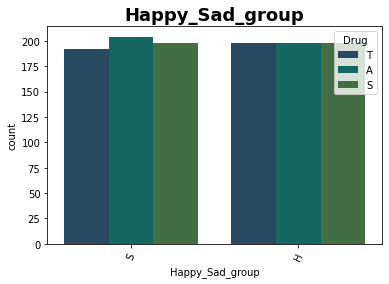

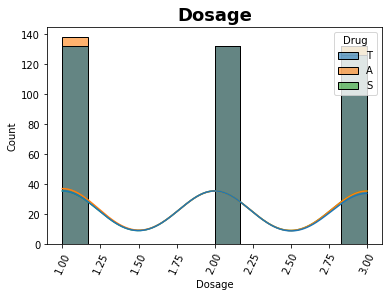

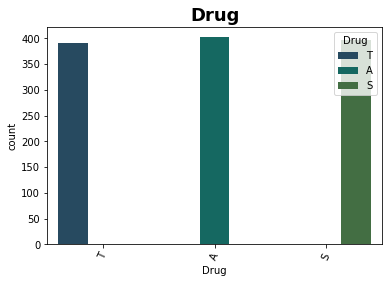

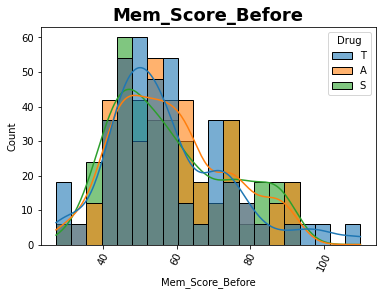

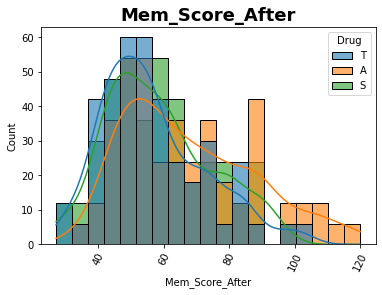

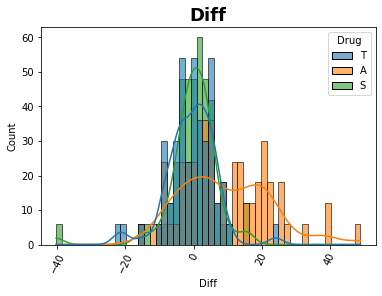

In [ ]:
for feat in df.columns:
  if df[feat].dtype == 'object':
    sns.countplot(data=df, x=feat, palette=palette, hue='Drug')
  else:
    sns.histplot(data=df, x=feat,  hue='Drug', kde=True, alpha=.6)
  plt.title(feat, fontsize=18, fontweight='bold')
  plt.xticks(rotation=65)
  plt.show()

**Observations**

+ the Drug was evenly dispursed except for features related to memory
+ A - Alprazolam (Xanax, Long-term) shows relationship with higher memory score after use.
 + **T - Triazolam (Halcion, Short-term), seems to have no effect**
   + **similar to S- Sugar Tablet** 


## distribution by age_cat

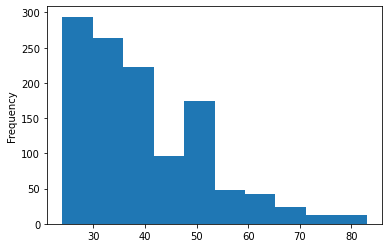

In [ ]:
df['age'].plot(kind='hist')

In [ ]:
def age_to_cat(x):
  if x > 55:
    value = 'senior'
  elif x < 35:
    value = 'young'
  else:
    value = 'adult'
  return value

In [ ]:
df['age_cat'] = df['age'].apply(age_to_cat)
df['age_cat']

0        adult
1        adult
2        adult
3        adult
4       senior
         ...  
1183     young
1184     adult
1185     adult
1186    senior
1187     young
Name: age_cat, Length: 1188, dtype: object

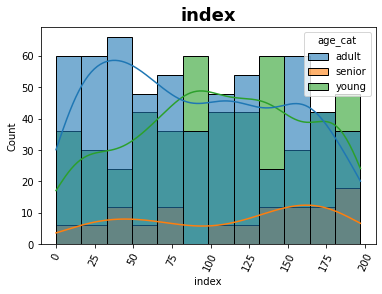

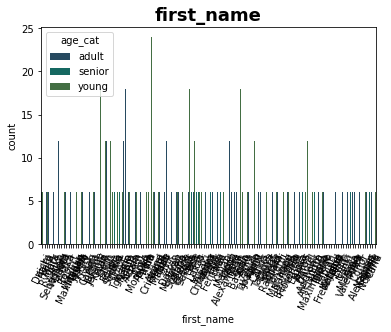

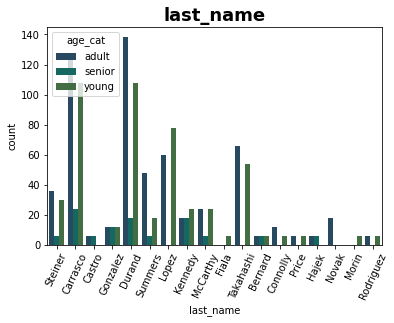

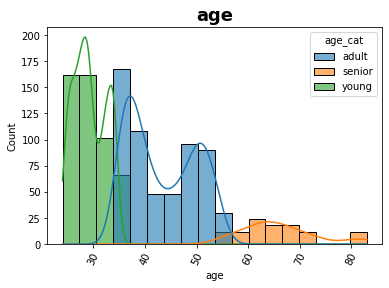

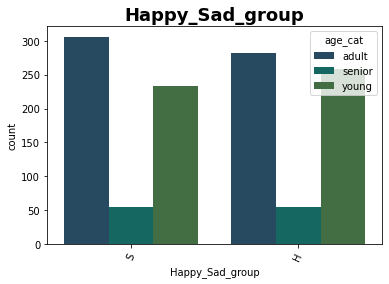

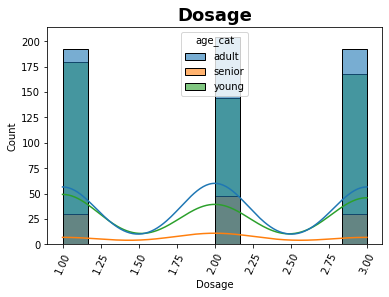

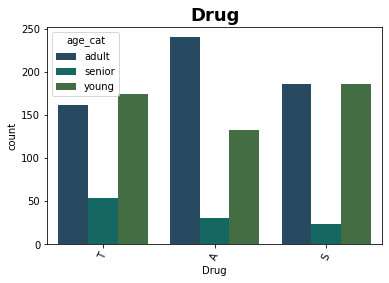

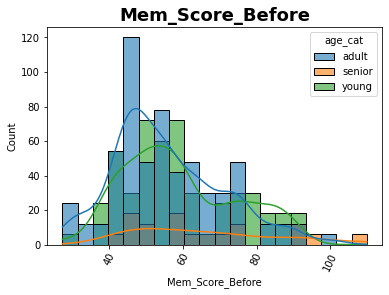

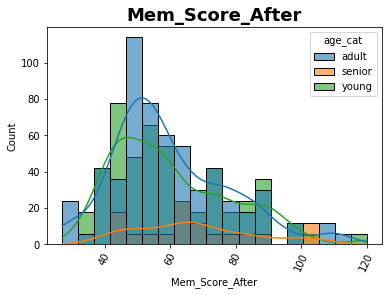

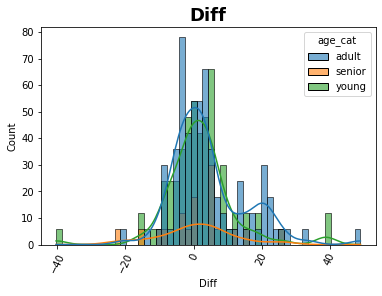

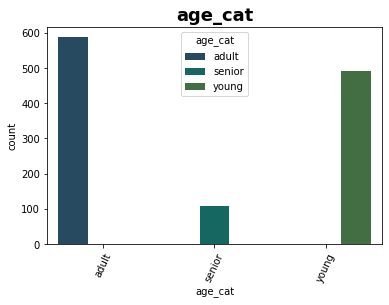

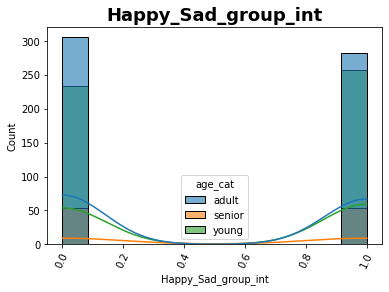

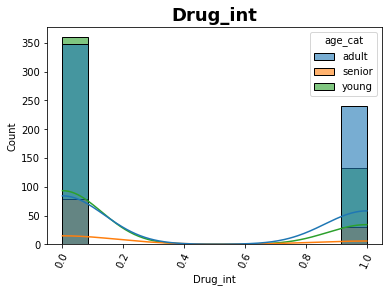

In [ ]:
for feat in df.columns:
  if df[feat].dtype == 'object':
    sns.countplot(data=df, x=feat, palette=palette, hue='age_cat')
  else:
    sns.histplot(data=df, x=feat,  hue='age_cat', kde=True, alpha=.6)
  plt.title(feat, fontsize=18, fontweight='bold')
  plt.xticks(rotation=65)
  plt.show()

**Observations**

+ same distribution of age groups across Happy Sad group
+ slightly more A drug was given to adults
+ small portion of adults were highly impacted by the drug

# encoding of categories

## Happy_Sad_group_int

In [ ]:
def hp_grp_to_int(x):
  if x == 'H':
    value = 1
  elif x == 'S':
    value = 0
  return value

In [ ]:
df['Happy_Sad_group_int'] = df['Happy_Sad_group'].apply(hp_grp_to_int)
df['Happy_Sad_group_int'].value_counts() 

0    594
1    594
Name: Happy_Sad_group_int, dtype: int64

## Drug_int

In [ ]:
def drg_to_int(x):
  if x == 'A':
    value = 1
  elif x == 'T':
    value = 0
  elif x == 'S':
    value = 0
  return value


In [ ]:
df['Drug_int'] = df['Drug'].apply(drg_to_int)
df['Drug_int'].value_counts()

0    786
1    402
Name: Drug_int, dtype: int64

# Bivariate Analysis

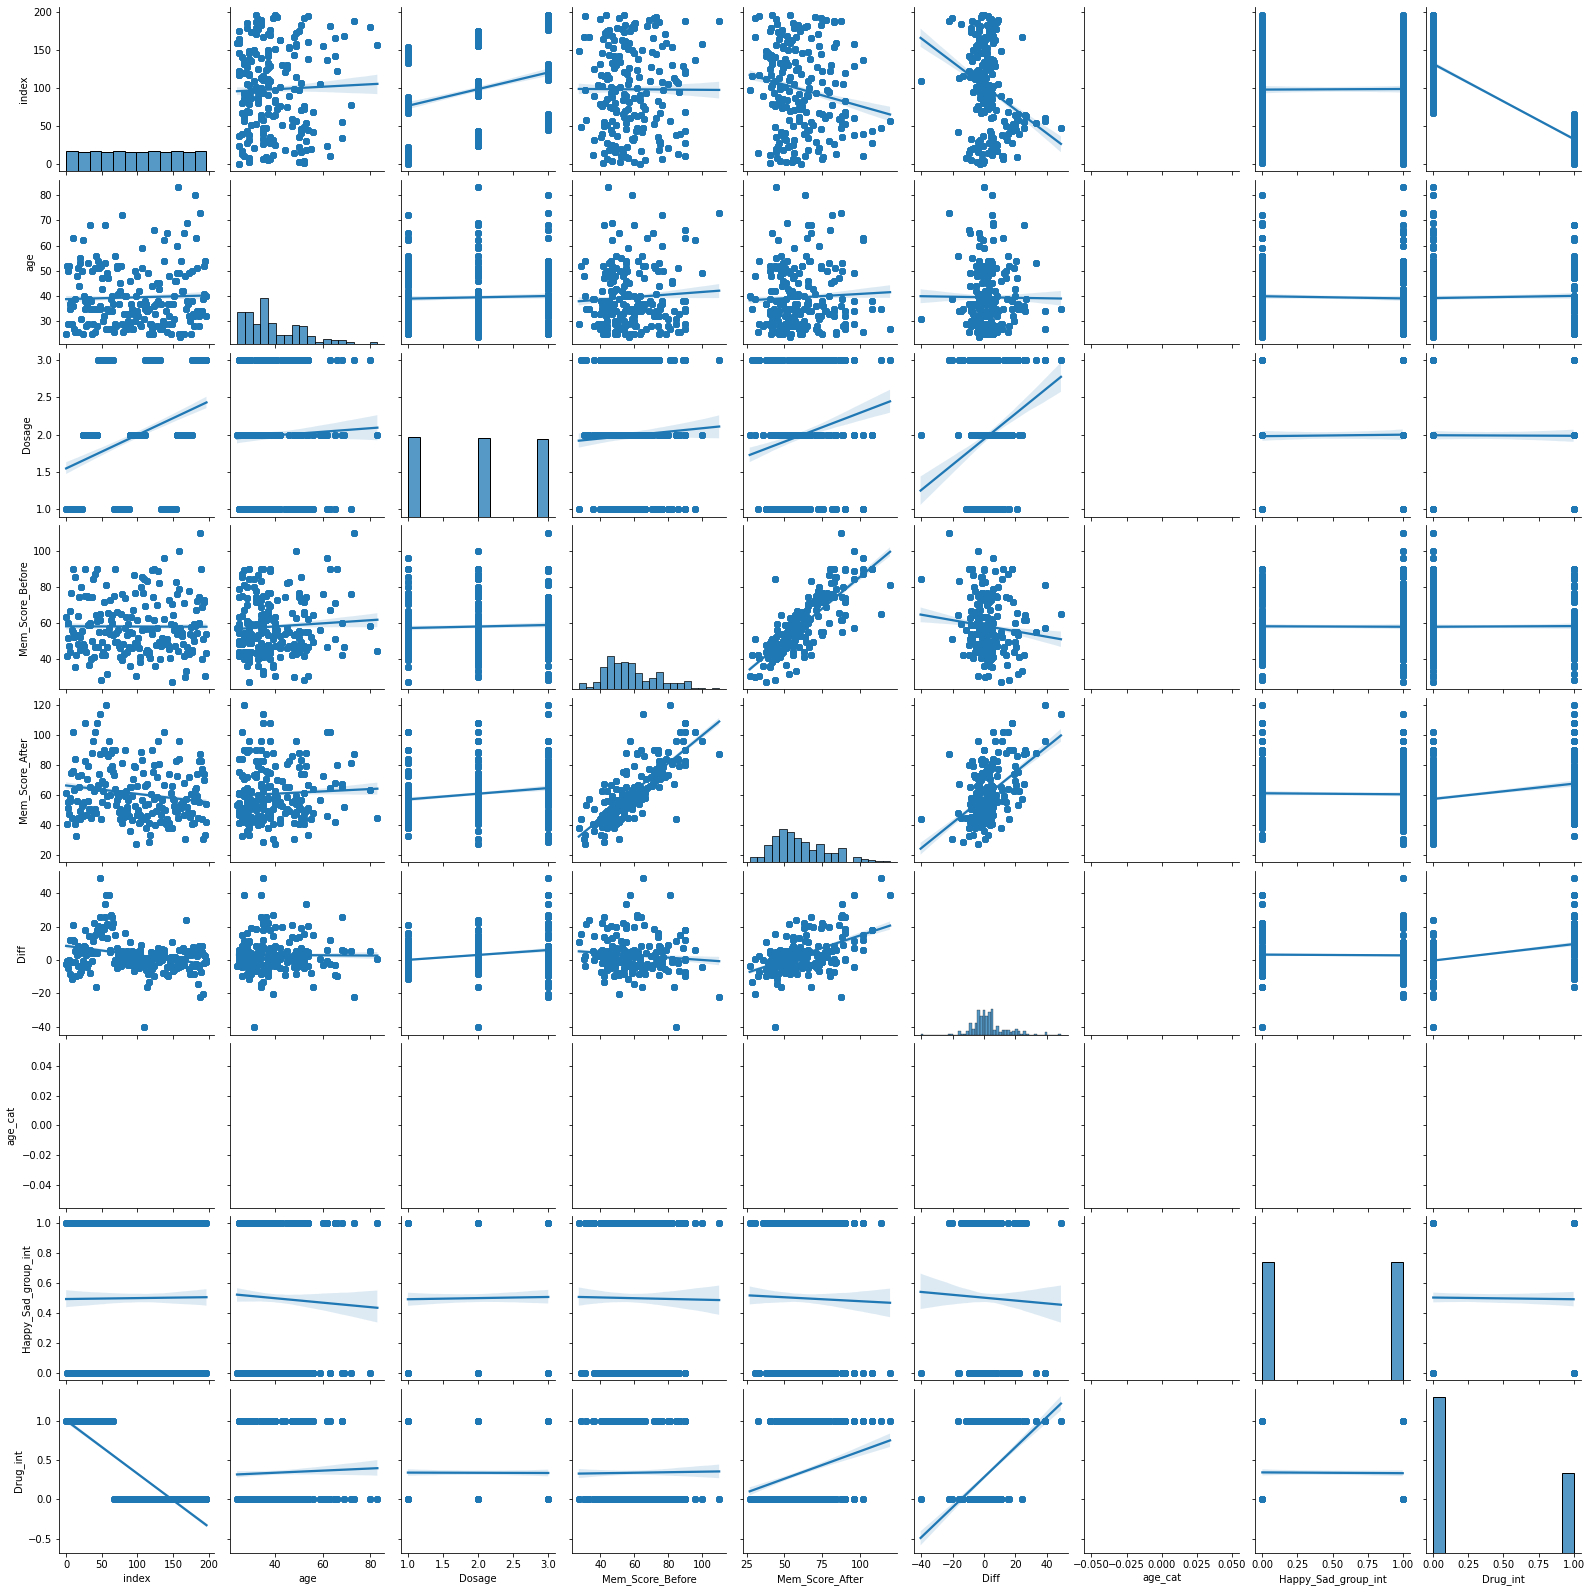

In [ ]:
sns.pairplot(df, palette=palette[2], kind='reg')

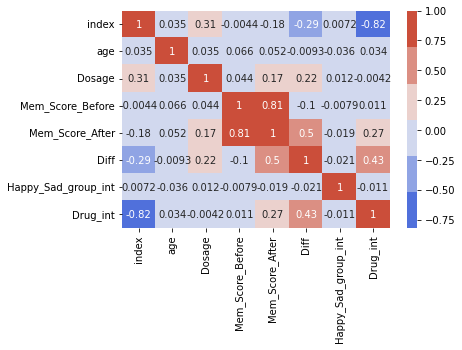

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap=sns.diverging_palette(260, 17, center='light'))

**Observations**

Diff shows a difference moderate correlation with drug type helping to confirm A - Alprazolam has an effect on Memory Score